In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("tsne_umap_plots/42_A_tsen_umap_embeddings.csv")
#print(df1)
#df1 = df1[df1["label"]=="Copepoda_Group_Oncaea"]
#df1 = df1[df1["label"]=="Copepoda_Microcalanus"]
df1 = df1[df1["label"]=="Copepoda_Calanus"]
df_test = pd.read_csv("output/update_wo_artefacts_test_dataset_PS992_20230727_nicole.csv", sep=";")
df_test.to_csv("output/excel_update_wo_artefacts_test_dataset_PS992_20230727.csv", sep=";")
df = pd.merge(df1, df_test, on='img_file_name', how='left')

In [3]:
print(df_test[["object_zoomie_state", "object_zoomie_group_id"]].value_counts())

object_zoomie_state  object_zoomie_group_id
real                 1.0                       1
                     6289.0                    1
                     6303.0                    1
                     6300.0                    1
                     6299.0                    1
                                              ..
                     3316.0                    1
                     3315.0                    1
                     3314.0                    1
                     3313.0                    1
                     9952.0                    1
Length: 7161, dtype: int64


In [4]:
print(df_test.columns.tolist())

['Unnamed: 0', 'new_index', 'img_file_name', 'img_rank', 'object_id', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_link', 'object_depth_min', 'object_depth_max', 'object_annotation_status', 'object_annotation_person_name', 'object_annotation_person_email', 'object_annotation_date', 'object_annotation_time', 'object_annotation_category', 'object_annotation_category_id', 'object_index', 'object_haul', 'object_bottom_depth', 'object_pressure', 'object_temperature', 'object_salinity', 'object_conductivity', 'object_oxygen_concentration', 'object_temperature_oxsens', 'object_oxygen_saturation', 'object_dr._haardt_fluorescence_channel_a', 'object_area_px', 'object_form', 'object_area', 'object_length', 'object_width', 'object_convexity', 'object_structure', 'object_graymean', 'object_kurtosis', 'object_skewness', 'object_hu_moment_1', 'object_hu_moment_2', 'object_hu_moment_3', 'object_hu_moment_4', 'object_hu_moment_5', 'object_hu_moment_6', 'object_hu_moment_7', 'objec

In [5]:
#df = df.drop(columns=["latent_space"])
df.shape
def left_or_right(x):
    if x<5:
        return "left"
    else:
        return "right"
df['l_or_r'] =df['x_umap'].apply(lambda x: left_or_right(x))

In [6]:
df['l_or_r'].value_counts()

right    1889
left     1544
Name: l_or_r, dtype: int64

In [7]:
df001 =df.copy()
df001.to_csv("output/42_Copepoda_Calanus_PS992_20230727.csv", sep=";")
# "root_path_x", "img_file_name", "l_or_r", "label_x", "object_annotation_category","object_station"
# "object_lat","object_lon"
df002 = df001[["img_file_name", "root_path_x", "l_or_r", "label_x", "object_annotation_category","object_station", "object_lat","object_lon"]]
df002.to_csv("output/42_Filtered_Copepoda_Calanus_PS992_20230727.csv", sep=";")
df002.head()

,img_file_name,root_path_x,l_or_r,label_x,object_annotation_category,object_station,object_lat,object_lon
0,20160703 233508 375 000000 1932 0081.png,data/export_data/export_1622_20230122_1456/__D...,left,Copepoda_Calanus,Calanus,PS99_0053-5,79.90183,2.95050
1,20160703 232856 240 000000 0000 0000.png,data/export_data/export_1622_20230122_1456/__D...,left,Copepoda_Calanus,CVstage<Calanus,PS99_0053-5,79.90183,2.95050
2,20160630 163714 955 000000 1083 0339.png,data/export_data/export_1622_20230122_1456/__D...,right,Copepoda_Calanus,CVstage<Calanus hyperboreus,PS99-048,78.82200,-2.72583
3,20160707 023238 259 000001 1878 0318.png,data/export_data/export_1622_20230122_1456/__D...,right,Copepoda_Calanus,CVstage<Calanus,PS99_059,79.13267,2.85033
4,20160630 170638 853 000000 0711 0546.png,data/export_data/export_1622_20230122_1456/__D...,right,Copepoda_Calanus,CVstage<Calanus hyperboreus,PS99-048,78.82200,-2.72583


In [8]:
df004 = df002[["object_station", "object_annotation_category"]].value_counts()

In [9]:
df004.sort_index()

object_station  object_annotation_category  
PS99-048        CIIIstage<Calanus                 2
                CIVstage<Calanus                 14
                CVstage<Calanus                 342
                CVstage<Calanus hyperboreus      19
                Calanus                         124
                Calanus hyperboreus               2
                female<Calanus                  199
                female<Calanus hyperboreus        6
PS99.2-51       CIVstage<Calanus                  5
                CIVstage<Calanus hyperboreus      9
                CVstage<Calanus                  62
                CVstage<Calanus hyperboreus      55
                Calanus                          22
                Calanus hyperboreus               3
                female<Calanus                   47
                female<Calanus hyperboreus       22
PS99_0053-5     CIIIstage<Calanus                76
                CIVstage<Calanus                 81
                CIV

In [ ]:
import os
import pandas as pd
import shutil

df002['folder_name'] = df002['object_station'] + df002['label_x'] + df002['l_or_r']
folder_counts = df002['folder_name'].value_counts()

for folder_name in folder_counts.index:
    os.makedirs(os.path.join('object_station', folder_name), exist_ok=True)

# Step 2: Copy images to their corresponding folders
for index, row in df002.iterrows():
    img_file_name = row['img_file_name']
    root_path_x = row['root_path_x']
    folder_name = row['folder_name']

    src_path = os.path.join(root_path_x, img_file_name)
    dst_path = os.path.join('object_station', folder_name, img_file_name)
    print(src_path, dst_path)
    #shutil.copy(src_path, dst_path)

print("Images have been copied to the corresponding folders.")

In [ ]:
df002.columns

/var/folders/l5/7vqpfl9j2yd9xqq2n8kh8tyc0000gn/T/ipykernel_44092/2689919947.py:10: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns_plot_tsne =sns.scatterplot(data=df001,x='x_umap', y='y_umap',  hue='label_x', legend='full',palette=palette )


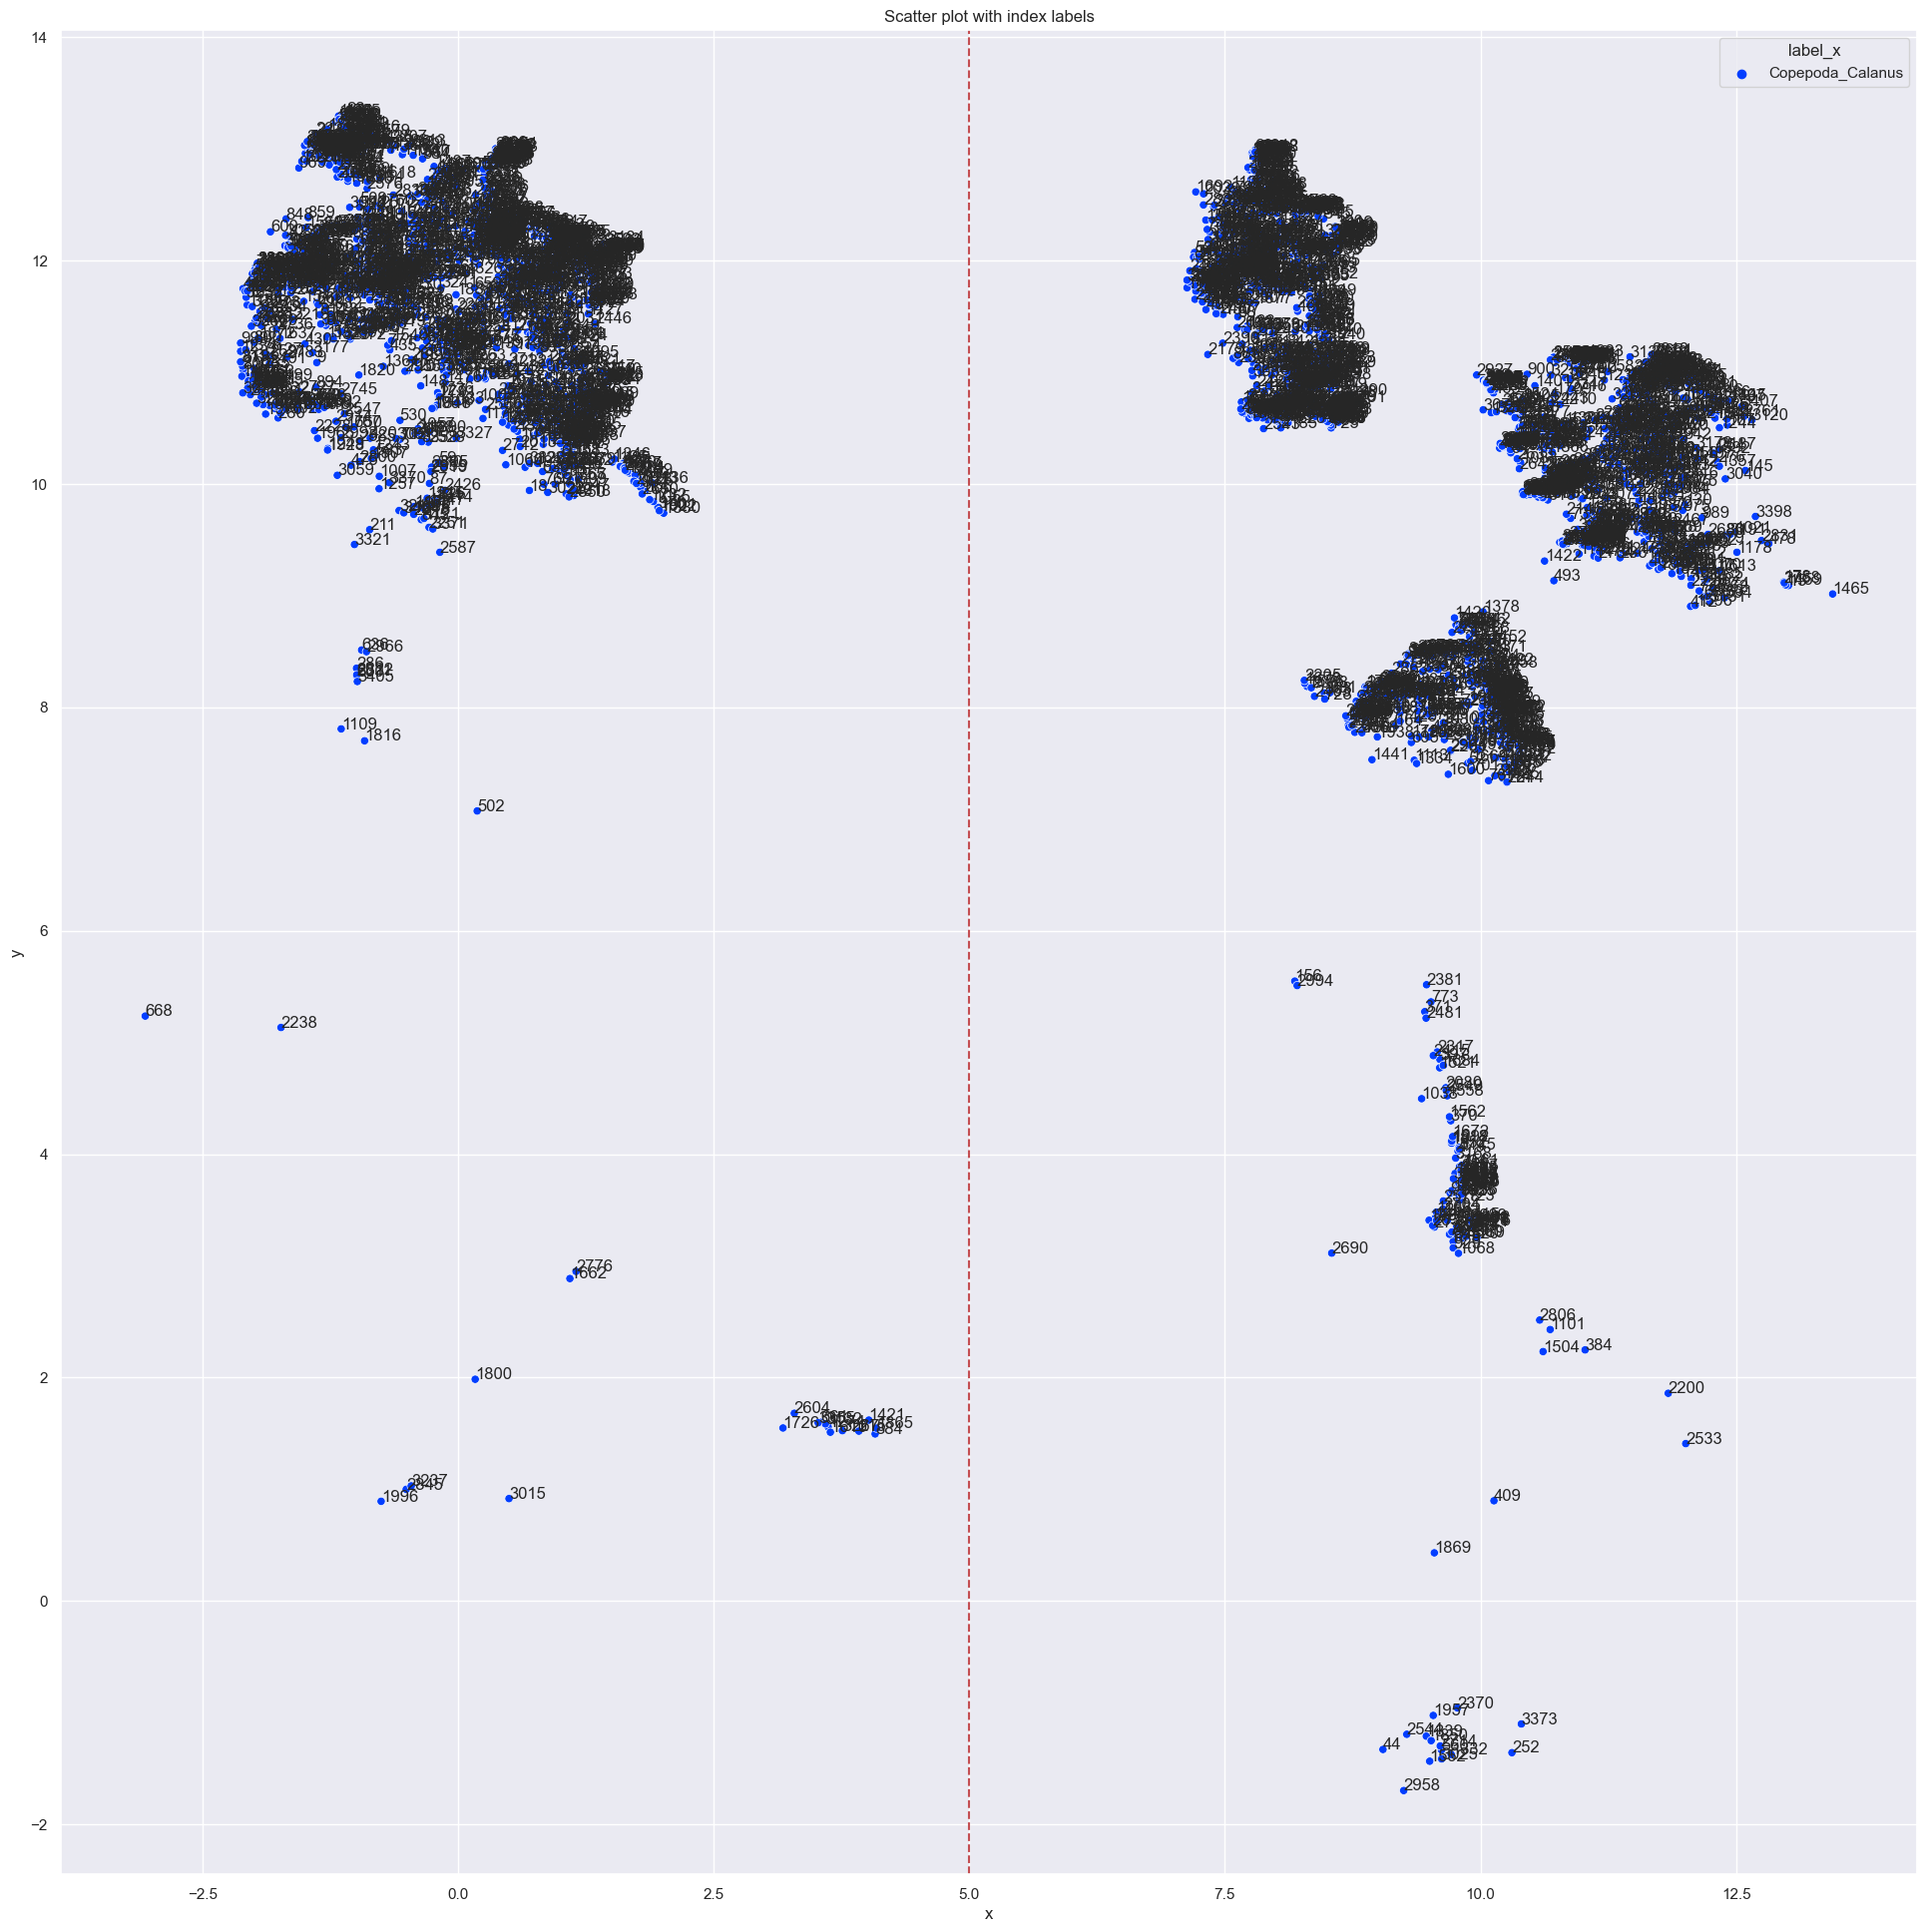

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create example dataframe
import seaborn as sns
sns.set(rc={'figure.figsize':(24,24)})
palette=sns.color_palette("bright",n_colors=10)
# create scatter plot
fig, ax = plt.subplots()
sns_plot_tsne =sns.scatterplot(data=df001,x='x_umap', y='y_umap',  hue='label_x', legend='full',palette=palette )

# add index labels to each point
for i, row in df001.iterrows():
    ax.annotate(i, (row['x_umap'], row['y_umap']))

# add axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axvline(x=5, color='r', linestyle='--', label='x = 5')
ax.set_title('Scatter plot with index labels')
plt.savefig('42_umap__plot_20230727.jpeg')
# show plot
plt.show()

In [ ]:
df_right = df[df["x_umap"]>=5]
#df_right =df_right[df_right["y_umap"]>=4]
df_left = df[df["x_umap"]<5]
#df_left =df_left[df_left["y_umap"]>=4]

In [ ]:
#df_right_ = df_right.drop(columns=["latent_space"])
#df_right_.to_csv("elch_analysis/right_data_geq_5_on_xaxis.csv", sep=";")

In [ ]:
#df_left_= df_left.drop(columns=["latent_space"])
#df_left_.to_csv("elch_analysis/left_data_geq_5_on_xaxis.csv", sep=";")

In [ ]:
cols = list(df_right.columns)
cols

In [ ]:
df_left['object_annotation_category'].value_counts().to_csv("elch_analysis/42_left_data_geq_5_on_xaxis_object_annotation_category.csv", sep=";")
df_left['object_annotation_category'].value_counts()

In [ ]:
df_right['object_annotation_category'].value_counts().to_csv("elch_analysis/42_right_data_geq_5_on_xaxis_object_annotation_category.csv", sep=";")
df_right['object_annotation_category'].value_counts()

In [ ]:
df_left['object_date'].value_counts()

In [ ]:
df_right['object_date'].value_counts()

In [ ]:
df_left['object_lon'].value_counts()

In [ ]:
df_right['object_lon'].value_counts()

In [ ]:
df_right[['object_lon', 'object_lat', "object_haul", "object_station", 'object_date']].value_counts().to_csv("elch_analysis/42_right_data_geq_5_on_xaxis_object_values.csv", sep=";")
df_right[['object_lon', 'object_lat', "object_haul", "object_station", 'object_date']].value_counts()

In [ ]:
df_left[['object_lon', 'object_lat', "object_haul", "object_station", 'object_date']].value_counts().to_csv("elch_analysis/42_left_data_geq_5_on_xaxis_object_values.csv", sep=";")
df_left[['object_lon', 'object_lat', "object_haul", "object_station", 'object_date']].value_counts()

In [ ]:
df_r = df001[df001["l_or_r"]=="left"]
df_l = df001[df001["l_or_r"]=="right"]
nc_r = df_r.select_dtypes(include=np.number)
nc_l = df_l.select_dtypes(include=np.number)

In [ ]:
nc_r.mean()

In [ ]:
nc_l.mean()

In [ ]:
merged = pd.concat([nc_r.mean(),nc_l.mean(), nc_r.var(),nc_l.var(), nc_r.min(), nc_l.min(),nc_r.max(), nc_l.max(),nc_r.std(), nc_l.std(),nc_r.median(), nc_l.median(),nc_r.skew(), nc_l.skew(), nc_r.kurtosis(), nc_l.kurtosis()], axis =1)

In [ ]:
merged

In [ ]:
# Rename the columns
merged.rename(columns={0: 'mean_r', 1: 'mean_l', 2: 'var_r', 3: 'var_l', 4:'min_r', 5:'min_l', 6:'max_r', 7:'max_l', 8:'std_r', 9:'std_l', 10:'median_r', 11:'median_l', 12:'skew_r', 13:'skew_l', 14:'kurtosis_r', 15:'kurtosis_l'}, inplace=True)

In [ ]:
print(merged)

In [62]:
merged_na = merged.dropna()

In [63]:
merged_na

,mean_r,mean_l,var_r,var_l,min_r,min_l,max_r,max_l,std_r,std_l,median_r,median_l,skew_r,skew_l,kurtosis_r,kurtosis_l
Unnamed: 0_x,10169.428109,10374.866596,3.529414e+07,3.607384e+07,12.000000,2.000000,20654.000000,20670.000000,5940.887047,6006.150216,10091.000000,10579.000000,0.009019,0.000396,-1.187224,-1.243034
count_x,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
x_tsne,54.744999,10.952531,1.528055e+02,1.522772e+02,-45.258343,-48.724440,72.886140,30.834000,12.361450,12.340064,57.281197,10.613495,-2.010369,-1.295058,7.625778,3.528442
y_tsne,9.874795,42.799121,7.796571e+01,2.032646e+02,-36.302643,-7.017790,46.763400,69.020256,8.829820,14.257088,10.802601,40.903830,-0.643630,-0.230578,0.747364,0.121898
x_umap,-0.107957,9.590178,1.197306e+00,2.344641e+00,-3.058425,7.130349,4.092749,13.444462,1.094215,1.531222,-0.053514,9.720609,0.140551,0.155375,-0.284910,-1.292187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object_mc_extent,0.117692,0.152895,2.114070e-03,2.379574e-03,0.023051,0.027764,0.380116,0.371100,0.045979,0.048781,0.107322,0.144228,1.688714,1.029820,3.939075,1.734316
object_mc_local_centroid_col,230.276098,211.161879,5.682873e+03,3.872016e+03,23.231740,30.505434,628.379097,692.177372,75.384833,62.225525,223.922534,203.009498,0.503255,0.913284,2.271828,3.309925
object_mc_local_centroid_row,207.371794,193.557373,4.027798e+03,2.313688e+03,32.259556,42.989029,535.239529,462.348983,63.464938,48.100808,199.605990,187.170558,1.237853,0.873530,3.796595,3.002462
object_mc_solidity,0.264924,0.219315,1.374992e-02,8.424447e-03,0.044374,0.047804,0.831732,0.809807,0.117260,0.091785,0.237307,0.199572,1.482314,2.184688,3.013721,7.665295


In [64]:
merged_na["mean_q"] =merged_na["mean_r"]/merged_na["mean_l"]+0.00000001
merged_na["mean_p"] =merged_na["mean_l"]/merged_na["mean_r"]+0.00000001
merged_na["mean_pq"] = merged_na[["mean_p", "mean_l"]].max(axis=1)

/var/folders/l5/7vqpfl9j2yd9xqq2n8kh8tyc0000gn/T/ipykernel_44092/613339902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_na["mean_q"] =merged_na["mean_r"]/merged_na["mean_l"]+0.00000001
/var/folders/l5/7vqpfl9j2yd9xqq2n8kh8tyc0000gn/T/ipykernel_44092/613339902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_na["mean_p"] =merged_na["mean_l"]/merged_na["mean_r"]+0.00000001
/var/folders/l5/7vqpfl9j2yd9xqq2n8kh8tyc0000gn/T/ipykernel_44092/613339902.py:3: SettingWithCopyWarning: 
A value 

In [65]:
merged_sorted = merged_na.sort_values(by='mean_pq', ascending=False)

In [66]:
merged_sorted

,mean_r,mean_l,var_r,var_l,min_r,min_l,max_r,max_l,std_r,std_l,median_r,median_l,skew_r,skew_l,kurtosis_r,kurtosis_l,mean_q,mean_p,mean_pq
object_annotation_date,2.019030e+07,2.019028e+07,5.576213e+06,4.423383e+05,2.017111e+07,2.019012e+07,2.020031e+07,2.020071e+07,2.361401e+03,6.650852e+02,2.019021e+07,2.019030e+07,-2.318785,14.854905,39.657990,222.753689,1.000001,9.999991e-01,2.019028e+07
object_date,2.016070e+07,2.016068e+07,1.048319e+01,1.383592e+03,2.016063e+07,2.016063e+07,2.016071e+07,2.016071e+07,3.237776e+00,3.719667e+01,2.016070e+07,2.016071e+07,-22.055211,-0.524057,493.826941,-1.726366,1.000001,9.999988e-01,2.016068e+07
object_mc_intden,1.228034e+06,1.731427e+06,1.080470e+12,1.464460e+12,3.233200e+04,9.303389e+04,8.532571e+06,1.596602e+07,1.039457e+06,1.210149e+06,9.596925e+05,1.537891e+06,3.312639,4.592968,14.020031,33.316782,0.709261,1.409918e+00,1.731427e+06
object_fourier_descriptor_01,4.658714e+05,3.775571e+05,1.278319e+11,6.585480e+10,3.036274e+04,3.868193e+04,3.983267e+06,4.898662e+06,3.575358e+05,2.566219e+05,3.789543e+05,3.373775e+05,3.395558,6.424195,17.356941,79.870327,1.233910,8.104320e-01,3.775571e+05
object_mc_bounding_box_area,1.920006e+05,1.628566e+05,6.982571e+09,3.148578e+09,4.428000e+04,4.855500e+04,8.559000e+05,6.777300e+05,8.356178e+04,5.611219e+04,1.752270e+05,1.546380e+05,2.733581,2.470362,11.542010,13.543165,1.178955,8.482089e-01,1.628566e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object_mc_%area,3.841028e-02,2.205660e-02,1.467824e-03,8.119610e-04,0.000000e+00,0.000000e+00,2.585122e-01,3.416388e-01,3.831219e-02,2.849493e-02,2.571270e-02,1.272245e-02,1.753861,3.552351,3.465701,18.975183,1.741442,5.742368e-01,5.742368e-01
object_lenght,2.437071e-02,0.000000e+00,7.786442e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.195000e+01,0.000000e+00,8.824082e-01,0.000000e+00,0.000000e+00,0.000000e+00,36.207734,0.000000,1311.000000,0.000000,inf,1.000000e-08,1.000000e-08
img_rank,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00
object_mc_bx,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00


In [67]:
merged_sorted =merged_sorted.drop(columns=["mean_q","mean_p","mean_pq"])
merged_sorted =merged_sorted.round(2)
merged_sorted.to_csv("barbara/0recht_vs_links_stats_evals_on_parameters.csv", sep=";")

In [68]:
import pandas as pd
from scipy.stats import ttest_ind

# Nehmen wir an, Sie haben bereits Ihre beiden DataFrames df1 und df2

# Überprüfen Sie, ob die Spalten in beiden DataFrames übereinstimmen
if nc_r.columns.tolist() != nc_l.columns.tolist():
    print("Die Spalten in den beiden DataFrames stimmen nicht überein.")
else:
    # Hier gehen wir davon aus, dass die Spalten in beiden DataFrames gleich sind

    # Liste für die Ergebnisse
    results = []

    # Führen Sie den t-Test für jede Spalte durch
    for column in nc_r.columns:
        # Extrahieren Sie die Daten für jede Spalte
        data1 = nc_r[column]
        data2 = nc_l[column]

        # Führen Sie den t-Test durch
        t_stat, p_value = ttest_ind(data1, data2)

        # Entscheiden Sie, ob die Spalten signifikant unterschiedlich sind (hier verwenden wir eine Signifikanzniveau von 0.05)
        if p_value < 0.05:
            difference = "Yes"
        elif p_value == np.nan:
            print("NAN")
        else:
            difference = "No"

        # Ergebnisse hinzufügen
        results.append({"Column": column, "Difference": difference, "P-Value": p_value})

    # DataFrame aus der Ergebnisliste erstellen
    results_df = pd.DataFrame(results)

    # Ergebnisse anzeigen
    print(results_df)

                          Column Difference       P-Value
0                   Unnamed: 0_x         No  3.164792e-01
1                        count_x         No           NaN
2                         x_tsne        Yes  0.000000e+00
3                         y_tsne        Yes  0.000000e+00
4                         x_umap        Yes  0.000000e+00
..                           ...        ...           ...
93  object_mc_local_centroid_row        Yes  5.124929e-13
94            object_mc_solidity        Yes  1.418426e-36
95  sample_dataportal_descriptor         No           NaN
96                acq_instrument         No           NaN
97                       count_y         No           NaN

[98 rows x 3 columns]


/var/folders/l5/7vqpfl9j2yd9xqq2n8kh8tyc0000gn/T/ipykernel_44092/3468177968.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(data1, data2)


In [69]:
results_df.to_csv("barbara/recht_vs_links_t_test_p_value_results_on_parameters.csv", sep=";", index=0)